In [1]:
# import glymur

In [2]:
!which jp2dump

/usr/local/bin/jp2dump


In [3]:
# help(glymur.Jp2k)

In [4]:
import os
from matplotlib import pyplot as plt
os.getcwd()

'/workspace'

In [5]:
from tiling.multi_res_Tiling import SectionProxy, TileAccessor, Span

In [6]:
# ls /store/repos1/37/NISL/*_compressed.jp2

In [7]:
proxy_lossless = SectionProxy(15, "NISSL", 1708)

print(proxy_lossless)

proxy_lossy = SectionProxy(15, "NISSL", 1708,iscompressed=True)

print(proxy_lossy)



{'id': 5944, 'position_index': 1708, 'jp2Path': '/data/storageIIT/humanbrain/analytics/37/NISL/B_37_FB3-SL_570-ST_NISL-SE_1708_lossless.jp2', 'pngPathLow': '/data/storageIIT/humanbrain/analytics/37/NISL/B_37_FB3-SL_570-ST_NISL-SE_1708_thumbnail.jpg', 'width': 81590, 'height': 83590, 'series': 10, 'rigidrotation': 90, 'notes': None, 'trsdata': None}{'brainid': 15, 'seriesType': 'NISSL', 'secnumber': 1708, 'modes': {'jp2': False, 'iip': True, 'mmap': False, 'tif': False}}
{'id': 5944, 'position_index': 1708, 'jp2Path': '/data/storageIIT/humanbrain/analytics/37/NISL/B_37_FB3-SL_570-ST_NISL-SE_1708_compressed.jp2', 'pngPathLow': '/data/storageIIT/humanbrain/analytics/37/NISL/B_37_FB3-SL_570-ST_NISL-SE_1708_thumbnail.jpg', 'width': 81590, 'height': 83590, 'series': 10, 'rigidrotation': 90, 'notes': None, 'trsdata': None}{'brainid': 15, 'seriesType': 'NISSL', 'secnumber': 1708, 'modes': {'jp2': False, 'iip': True, 'mmap': False, 'tif': False}}


In [8]:
proxy_lossless.check_local_jp2() #'/srv/siva/jp2cache')

./storage/jp2cache/B_37_FB3-SL_570-ST_NISL-SE_1708_lossless.jp2


False

In [9]:
proxy_lossless.check_tif()

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [10]:
proxy_lossless.check_mmap()

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [12]:
proxy_lossless.jp2path

In [13]:
print(proxy_lossless)

{'id': 5944, 'position_index': 1708, 'jp2Path': '/data/storageIIT/humanbrain/analytics/37/NISL/B_37_FB3-SL_570-ST_NISL-SE_1708_lossless.jp2', 'pngPathLow': '/data/storageIIT/humanbrain/analytics/37/NISL/B_37_FB3-SL_570-ST_NISL-SE_1708_thumbnail.jpg', 'width': 81590, 'height': 83590, 'series': 10, 'rigidrotation': 90, 'notes': None, 'trsdata': None}{'brainid': 15, 'seriesType': 'NISSL', 'secnumber': 1708, 'modes': {'jp2': False, 'iip': True, 'mmap': False, 'tif': False}}


In [14]:
# help(SectionProxy)

In [16]:

accessor = TileAccessor(proxy_lossless,0,tilespan=Span(4096,4096), use_iip=True) #,use_jp2=True) #resolution

print(accessor)

# accessor.display_tiling()

{'proxy': "{'id': 5944, 'position_index': 1708, 'jp2Path': '/data/storageIIT/humanbrain/analytics/37/NISL/B_37_FB3-SL_570-ST_NISL-SE_1708_lossless.jp2', 'pngPathLow': '/data/storageIIT/humanbrain/analytics/37/NISL/B_37_FB3-SL_570-ST_NISL-SE_1708_thumbnail.jpg', 'width': 81590, 'height': 83590, 'series': 10, 'rigidrotation': 90, 'notes': None, 'trsdata': None}{'brainid': 15, 'seriesType': 'NISSL', 'secnumber': 1708, 'modes': {'jp2': False, 'iip': True, 'mmap': False, 'tif': False}}", 'resolution': 0, 'imagespan': Span(w=81590, h=83590), 'tilespan': Span(w=4096, h=4096), 'ntiles': 400, 'ntiles_c': 20, 'ntiles_r': 20}


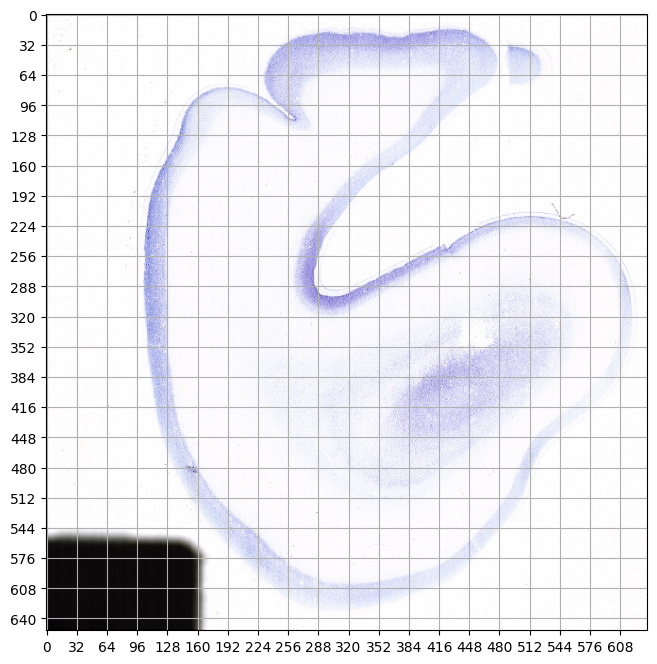

In [17]:
accessor.display_tiling()

In [18]:
data,rgn,url = accessor[30]

In [19]:
print(url)

http://apollo2.humanbrain.in:9081/fcgi-bin/iipsrv.fcgi?FIF=/data/storageIIT/humanbrain/analytics/37/NISL/B_37_FB3-SL_570-ST_NISL-SE_1708_lossless.jp2&WID=4096&HEI=4096&RGN=0.502022,0.049001,0.050202,0.049001&CVT=jpeg


In [20]:
rgn

Extent(point1=Point(x=40960, y=4096), point2=Point(x=45056, y=8192))

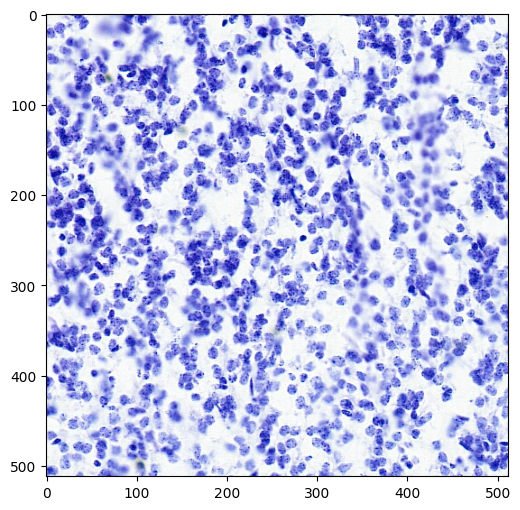

In [21]:
plt.figure(figsize=(6,6))
plt.imshow(data[:512,:512,:])
# plt.imsave('/srv/supriti/CellSeg-master/11950.png', data, cmap='gray')

In [22]:
# from tiling.multi_res_Tiling import to_shape

In [23]:
# tuple(to_shape(proxy_lossless.span()))

# parallel read local jp2 to memmap

In [17]:
from tiling.multi_res_Tiling import SectionMemmap

secmmap = SectionMemmap(proxy_lossless) #, force=True)

In [18]:
loadtime,flushtime=secmmap.create()

AssertionError: 

In [14]:
loadtime, flushtime

(datetime.timedelta(seconds=249, microseconds=666376),
 datetime.timedelta(seconds=3, microseconds=303967))

# kdu expand to tif

In [19]:
proxy_lossless.kdu_expand()

True

In [20]:
from skimage.io import imread,find_available_plugins
find_available_plugins()

{'fits': ['imread', 'imread_collection'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'gtk': ['imshow'],
 'imread': ['imread', 'imsave', 'imread_collection']}

In [21]:
proxy_lossless.tifpath

'/srv/siva/tifcache/B_37_FB3-SL_570-ST_NISL-SE_1708_lossless.tif'

In [24]:
from datetime import datetime
start = datetime.now()
tifarr = imread(proxy_lossless.tifpath)
elapsed = datetime.now()-start

In [25]:
elapsed

datetime.timedelta(seconds=11, microseconds=844932)

# concurrent

In [30]:
# import os
# os.getpid?

In [21]:
# !python chunked_pool_test.py 1500

worker 30324
worker 9448
worker 14156
worker 25348
worker 148
worker 13752
6 250 5
{9448: 525, 25348: 290, 30324: 185, 148: 185, 14156: 170, 13752: 145}
9448 275
25348 40
30324 -65
148 -65
14156 -80
13752 -105
